In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import pickle

In [6]:
data = pd.read_csv("../app/src/data/EuroMillions_numbers.csv", sep = ';')

In [7]:
data.head()

,Date,N1,N2,N3,N4,N5,E1,E2,Winner,Gain
0,2004-12-24,3,27,29,4,37,6,5,1,10000000
1,2004-12-17,49,22,19,15,46,9,2,1,26215627
2,2004-11-26,24,1,34,4,36,8,6,1,43756502
3,2004-10-22,9,25,1,40,23,3,9,1,25059130
4,2004-01-10,48,20,45,21,12,6,5,1,29785269


In [8]:
type(data['Date'][1])

str

<AxesSubplot:xlabel='value'>

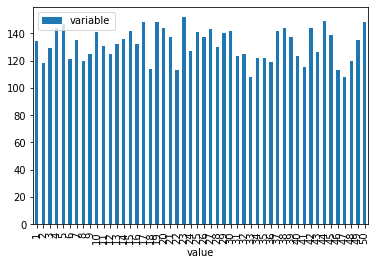

In [9]:
num = data[['N1', 'N2', 'N3', 'N4', 'N5']]
num = num.melt()
num = num.groupby('value').count()
num.plot.bar()

In [10]:
def oddEvenPatterns(t):
    nb = sum(1-n%2 for n in t)
    if ((nb==1) or (nb==4)):
        result = 0.1492618323925310
    elif ((nb == 3) or (nb==2)):
        result = 0.3256621797655230
    else:
        result = 0.0250759878419453
    return result

def lowHighPatterns(t):
    nb = sum(n<26 for n in t)
    if ((nb==1) or (nb==4)):
        result = 0.1492618323925310
    elif ((nb == 3) or (nb==2)):
        result = 0.3256621797655230
    else:
        result = 0.0250759878419453
    return result

def createRows(tirages, n=4):
    tirages_tmp = np.copy(tirages)
    l = []
    for t in tirages_tmp:
        tmp = np.copy(t[:5])
        t = np.append(t, [oddEvenPatterns(tmp)], axis=0)
        t = np.append(t, [lowHighPatterns(tmp)], axis=0)
        t = np.append(t, [1], axis=0)
        l.append(t)
    tirages_tmp = np.array(l)
    
    for tirage in tirages:
        
        array_numeros = tirage[:5]
        array_etoiles = tirage[-2:]
        
        for i in range(n):
            numeros_generation = np.random.choice(np.arange(1, 51), replace=False, size=(5,))
            while (np.sort(array_numeros) == np.sort(numeros_generation)).all():
                numeros_generation = np.random.choice(np.arange(1, 51), replace=False, size=(5,))
            
            etoiles_generation = np.random.choice(np.arange(1, 13), replace=False, size=(2,))
            while (np.sort(array_etoiles) == np.sort(etoiles_generation)).all():
                etoiles_generation = np.random.choice(np.arange(1, 13), replace=False, size=(2,))
                
            row_to_append = np.concatenate((numeros_generation, etoiles_generation), axis=0)
            row_to_append = np.concatenate((row_to_append, [oddEvenPatterns(numeros_generation)]), axis=0)
            row_to_append = np.concatenate((row_to_append, [lowHighPatterns(numeros_generation)]), axis=0)
            row_to_append = np.concatenate((row_to_append, [0]), axis=0)
            
            tirages_tmp = np.append(tirages_tmp, [row_to_append], axis=0)
            
    return tirages_tmp

tirages = data[["N1", "N2", "N3", "N4", "N5", "E1", "E2"]].to_numpy()
tirages =createRows(tirages, 9)

In [11]:
def createRows(tirages, n=4):
    tirages_tmp = np.copy(tirages)
    l = []
    for t in tirages_tmp:
        t = np.append(t, [1], axis=0)
        l.append(t)
    tirages_tmp = np.array(l)
    
    for tirage in tirages:
        
        array_numeros = tirage[:5]
        array_etoiles = tirage[-2:]
        
        for i in range(n):
            numeros_generation = np.random.choice(np.arange(1, 51), replace=False, size=(5,))
            while (np.sort(array_numeros) == np.sort(numeros_generation)).all():
                numeros_generation = np.random.choice(np.arange(1, 51), replace=False, size=(5,))
            
            etoiles_generation = np.random.choice(np.arange(1, 13), replace=False, size=(2,))
            while (np.sort(array_etoiles) == np.sort(etoiles_generation)).all():
                etoiles_generation = np.random.choice(np.arange(1, 13), replace=False, size=(2,))
                
            row_to_append = np.concatenate((numeros_generation, etoiles_generation), axis=0)
            row_to_append = np.concatenate((row_to_append, [0]), axis=0)
            
            tirages_tmp = np.append(tirages_tmp, [row_to_append], axis=0)
            
    return tirages_tmp



tirages = data[["N1", "N2", "N3", "N4", "N5", "E1", "E2"]].to_numpy()
tirages =createRows(tirages)

In [12]:
X = []
y = []
for i in range(tirages.shape[0]):
    X.append((tirages[i][0:-1]).tolist())
    y.append(tirages[i][-1].tolist())

X = np.array(X)
y = np.array(y)
print(y)


X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print(y_train)
print(X_train[0])



[1 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[41 10 20 15 49 11  6]


In [17]:
model = SVC(probability=True)
model.fit(X_train, y_train)
print(X_test.shape)
result = model.predict_proba(X_test)

res1 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        res1.append(result[i][1])

res1 = np.array(res1)     
threshold = np.median(res1)

y_pred = []

for i in range(len(result)):
    if result[i][1] > threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


(2175, 7)
[[1206  536]
 [ 217  216]]
0.3645569620253165
0.6537931034482759


In [20]:
print(result[0][0])

0.873779199150703


In [10]:
# save the model to disk
filename = 'SVC.sav'
pickle.dump(model, open(filename, 'wb'))

In [13]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict_proba(X_test)

res1 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        res1.append(result[i][1])

res1 = np.array(res1)     
threshold = np.median(res1)

y_pred = []

for i in range(len(result)):
    if result[i][1] > threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2784 1098]
 [ 234  234]]
0.26
0.6937931034482758


In [299]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
result2=clf.predict_proba(X_test)

res1 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        res1.append(result2[i][1])

res1 = np.array(res1)
threshold = np.median(res1)

y_pred = []

for i in range(len(result2)):
    if result2[i][1] > threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)


print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2964  918]
 [ 242  226]]
0.2803970223325062
0.7333333333333333


In [197]:
import itertools

iterator = np.arange(1,50)

a = list(itertools.combinations(iterator, 5))

In [200]:
print(len(a))

1906884
